In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.python.client import device_lib
from keras import layers
from sklearn.model_selection import train_test_split
from PIL import Image
import random
from keras.models import load_model

In [ ]:
# print(tf.__version__)
# print(tf.test.is_built_with_cuda())
# sys_details = tf.sysconfig.get_build_info()
# print('Cuda version: ', sys_details["cuda_version"], "\n")
# print(tf.reduce_sum(tf.random.normal([1000, 1000])))
# print(tf.config.list_physical_devices('GPU'), "\n")
# print(device_lib.list_local_devices())
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# if tf.test.gpu_device_name():
#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
# else:
#     print('We have tensorflow CPU')

In [35]:
# Sciezki do danych
data_dir = "D:/labSem6/images_dataset"
clean_data_dir = os.path.join(data_dir, "ObrazyCzyste")
# Pobieranie listy nazw plików
image_files = os.listdir(clean_data_dir)
img_r = 256
# Tworzenie pustej listy do przechowywania przetworzonych obrazów
dataset = []
# Przetwarzanie obrazu
for image_name in image_files:
    image_path = os.path.join(clean_data_dir, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((img_r, img_r))
    image2arr = np.array(image) / 255.0  # Normalizacja wartości pikseli do [0, 1]
    dataset.append(image2arr)
# Konwersja do formatu tablicy numpy
dataset1 = np.array(dataset)
dataset2 = np.array(dataset) # Для шума
print("Wymiarowość:", dataset1.shape)
print("Wymiarowość:", dataset2.shape)

Wymiarowość: (940, 256, 256, 3)
Wymiarowość: (940, 256, 256, 3)


In [36]:
# Podział na próbkę treningową i testową
X_train, X_test = train_test_split(dataset1, test_size=0.2, random_state=42)

# Wyprowadzanie wymiarów próbek treningowych i testowych
print("Wymiarowosc traning:", X_train.shape)
print("Wymiarowosc test:", X_test.shape)

Wymiarowosc traning: (752, 256, 256, 3)
Wymiarowosc test: (188, 256, 256, 3)


Dla szumu
________________________________________________________________________

In [ ]:
# Podział na próbkę treningową i testową
X_train1, X_test1 = train_test_split(dataset2, test_size=0.2, random_state=42)

_________________________________________________________________________

In [14]:
# Parametry rozmycia Gaussa
kernel_size = (15, 15)  # Rozmiar jądra rozmycia
std_x = 0  # Стандартное отклонение по оси X (если 0, то автоматически рассчитывается из размера ядра)

# Tworzenie pustych tablic w celu dodawania rozmytych obrazów
x_train_blurred = []
x_test_blurred = []

# Dodawanie rozmytych obrazów do zestawu treningowego
for img in X_train:
    blurred_img = cv2.GaussianBlur(img, kernel_size, std_x)
    x_train_blurred.append(blurred_img)

# Dodawanie rozmytych obrazów do zestawu testowego
for img in X_test:
    blurred_img = cv2.GaussianBlur(img, kernel_size, std_x)
    x_test_blurred.append(blurred_img)

# Преобразование в формат numpy массива
x_train_blurred = np.array(x_train_blurred)
x_test_blurred = np.array(x_test_blurred)

# Ограничение значений пикселей до диапазона [0, 1]
x_train_blurred = np.clip(x_train_blurred, 0, 1)
x_test_blurred = np.clip(x_test_blurred, 0, 1)

# Вывод размерностей массивов
print("zbiór treningowy obrazów:", x_train_blurred.shape)
print("zbiór testowy obrazów rozmytych:", x_test_blurred.shape)


Размерность обучающей выборки с размытыми изображениями: (752, 256, 256, 3)
Размерность тестовой выборки с размытыми изображениями: (188, 256, 256, 3)


In [42]:
# Параметры размытия методом Motion
kernel_size = 20  # Размер ядра размытия

# Создание ядра размытия Motion
kernel_motion = np.zeros((kernel_size, kernel_size))
kernel_motion[int((kernel_size-1)/2), :] = np.ones(kernel_size)
kernel_motion /= kernel_size

# Создание пустых списков для добавления размытых изображений
x_train_blurred_motion = []
x_test_blurred_motion = []

# Добавление размытых изображений в обучающий набор данных
for img in X_train:
    blurred_img = cv2.filter2D(img, -1, kernel_motion)
    x_train_blurred_motion.append(blurred_img)

# Добавление размытых изображений в тестовый набор данных
for img in X_test:
    blurred_img = cv2.filter2D(img, -1, kernel_motion)
    x_test_blurred_motion.append(blurred_img)

# Преобразование в формат массива NumPy
x_train_blurred_motion = np.array(x_train_blurred_motion)
x_test_blurred_motion = np.array(x_test_blurred_motion)

# Ограничение значений пикселей до диапазона [0, 1]
x_train_blurred_motion = np.clip(x_train_blurred_motion, 0, 1)
x_test_blurred_motion = np.clip(x_test_blurred_motion, 0, 1)


Размерность обучающей выборки с размытыми изображениями методом Motion: (752, 256, 256, 3)
Размерность тестовой выборки с размытыми изображениями методом Motion: (188, 256, 256, 3)


Dla szumu
___________________________________________________________________________

In [27]:
noise =  np.random.normal(loc=0, scale=1, size=(img_r,img_r,1))
x_train_noise = np.clip((np.array(X_train1)+noise*0.6),0,1)
x_test_noise = np.clip((np.array(X_test1)+noise*0.6),0,1)
# Вывод размерностей массивов
print("Размерность обучающей выборки с размытыми изображениями:", x_train_noise.shape)
print("Размерность тестовой выборки с размытыми изображениями:", x_test_noise.shape)

Размерность обучающей выборки с размытыми изображениями: (752, 256, 256, 3)
Размерность тестовой выборки с размытыми изображениями: (188, 256, 256, 3)


___________________________________________________________________________

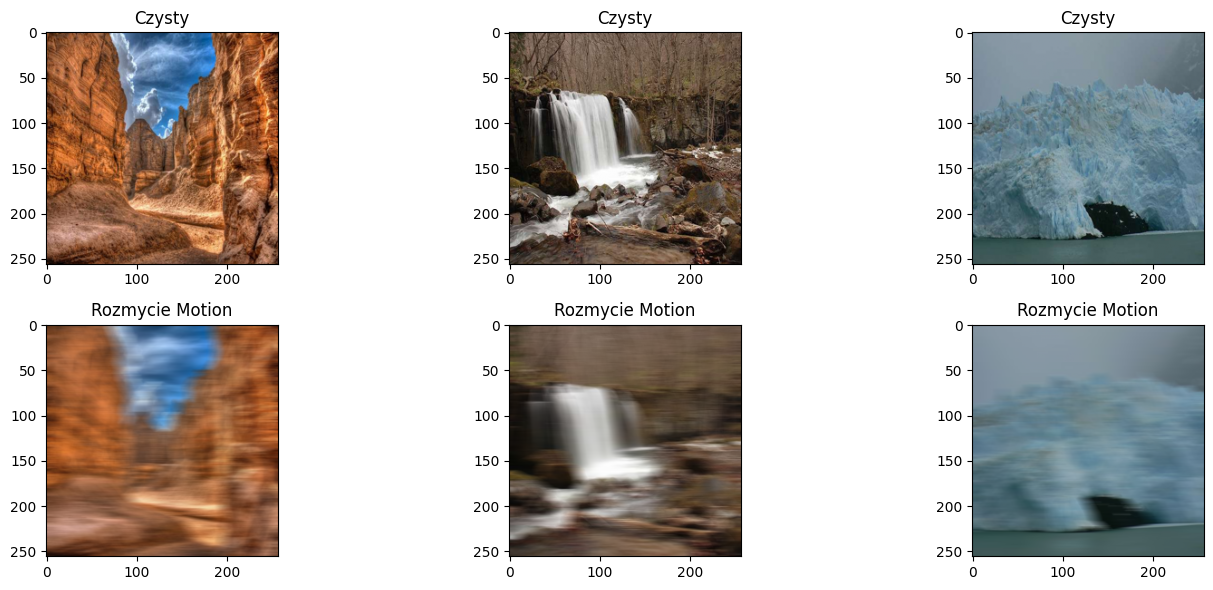

In [47]:
# Wybór 3 примеров
selected_examples_train = X_test[:3]
selected_examples_test = x_test_blurred_motion[:3]

# Wyświetlenie 6 obrazów (чистые и размытые)
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Wyświetlanie образцов из тренировочного набора данных
for i, example in enumerate(selected_examples_train):
    axes[0, i].imshow(example)
    axes[0, i].axis('on')
    axes[0, i].set_title('Czysty')
 # Установка меток значений пикселей по ширине

# Wyświetlanie образцов из тестового набора данных
for i, example in enumerate(selected_examples_test):
    axes[1, i].imshow(example)
    axes[1, i].axis('on')
    axes[1, i].set_title('Rozmycie Motion')
 # Установка меток значений пикселей по ширине
plt.tight_layout()
plt.show()


In [48]:
# Input
input_layer = layers.Input(shape=(img_r,img_r,3))
# Encoder
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
encoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output_layer   = layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)

# Autoenkoder model
model = tf.keras.Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        73792 

In [49]:
gaussian_early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [50]:
# Określanie parametrów szkolenia
epochs = 20
batch_size = 5
# Szkolenie modelu dla rozmy
history = model.fit(x_train_blurred_motion, X_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test_blurred_motion, X_test), callbacks=[gaussian_early_stop])
# # Szkolenie modelu dla szumu
# history = model.fit(x_train_noise, X_train1, epochs=epochs, batch_size=batch_size, validation_data=(x_test_noise, X_test1), callbacks=[gaussian_early_stop])


Epoch 1/20
151/151 [==============================] - 23s 120ms/step - loss: 0.0155 - val_loss: 0.0074
Epoch 2/20
151/151 [==============================] - 16s 107ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 3/20
151/151 [==============================] - 16s 107ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 4/20
151/151 [==============================] - 16s 108ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 5/20
151/151 [==============================] - 16s 107ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 6/20
151/151 [==============================] - 16s 107ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 7/20
151/151 [==============================] - 16s 107ms/step - loss: 0.0044 - val_loss: 0.0047
Epoch 8/20
151/151 [==============================] - 16s 107ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 9/20
151/151 [==============================] - 16s 107ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/20
151/151 [==============================] - 16s 107ms/step - l

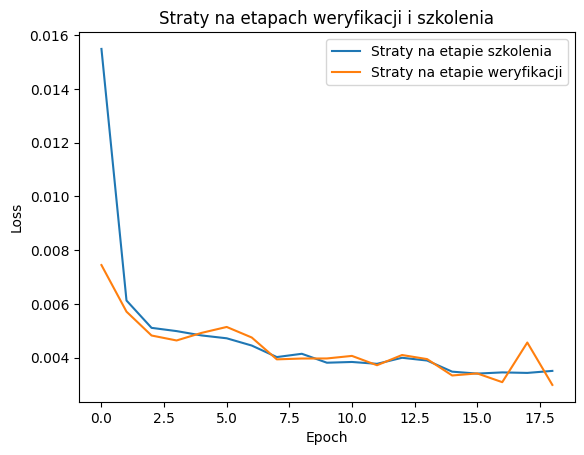

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Straty na etapach weryfikacji i szkolenia')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Straty na etapie szkolenia', 'Straty na etapie weryfikacji'], loc='upper right')
plt.show()

In [52]:
with tf.device('/cpu:0'):
    # Ocena modelu na danych testowych
    loss = model.evaluate(x_test_blurred_motion, X_test)
    print("Błąd rekonstrukcji na danych testowych:", loss)

6/6 [==============================] - 28s 5s/step - loss: 0.0030
Błąd rekonstrukcji na danych testowych: 0.002984726568683982


In [29]:
model_directory = 'my_models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

In [36]:
#model.save(os.path.join(model_directory, 'rtx_20.h5'))
#model.save(os.path.join(model_directory, 'rtx_20_2.h5'))
#model.save(os.path.join(model_directory, 'rtx_10.h5'))
#model.save(os.path.join(model_directory, 'rtx_szum.h5'))

In [30]:
loaded_rtx10 = load_model(os.path.join(model_directory, 'rtx_10.h5'))
#loaded_rtx20 = load_model(os.path.join(model_directory, 'rtx_20.h5'))
loaded_rtx20_2 = load_model(os.path.join(model_directory, 'rtx_20.h5'))
loaded_rtx_szum = load_model(os.path.join(model_directory, 'rtx_szum.h5'))

In [32]:
with tf.device('/cpu:0'):
    # Ocena modelu na danych testowych
    loss = loaded_rtx20_2.evaluate(x_train_blurred, X_train)
    print("Błąd rekonstrukcji na danych treningowych:", loss)

24/24 [==============================] - 119s 5s/step - loss: 0.0030
Błąd rekonstrukcji na danych treningowych: 0.0029779495671391487


In [31]:
with tf.device('/cpu:0'):
    # Ocena modelu na danych testowych
    loss = loaded_rtx20_2.evaluate(x_test_blurred, X_test)
    print("Błąd rekonstrukcji na danych testowych:", loss)

6/6 [==============================] - 28s 5s/step - loss: 0.0030
Błąd rekonstrukcji na danych testowych: 0.0030219205655157566


6/6 [==============================] - 28s 5s/step


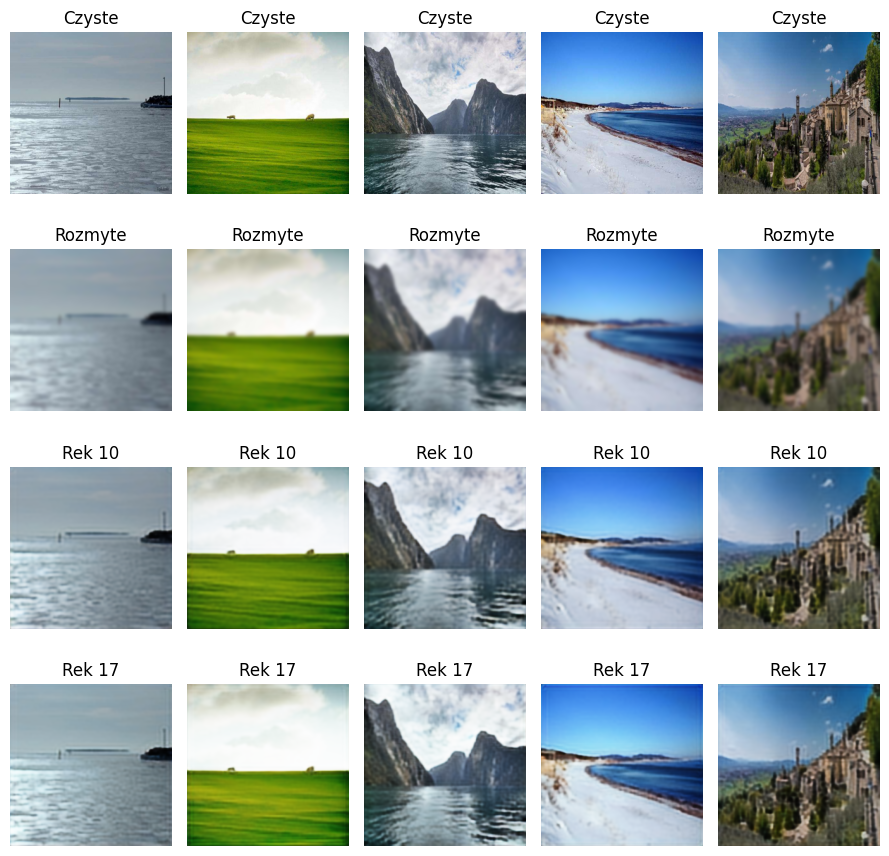

In [22]:
with tf.device('/cpu:0'):
    x_reconst10 = loaded_rtx10.predict(x_test_blurred)
    x_reconst20 = loaded_rtx20_2.predict(x_test_blurred)

    # Wybieranie losowych 5 indeksów obrazów
    random_indices = random.sample(range(len(x_test_blurred)), 5)

    # Wyświetlanie obrazów

    fig, axes = plt.subplots(nrows=4, ncols=len(random_indices), figsize=(9, 9))
    for i, index in enumerate(random_indices):
        clean_image = X_test[index]
        rozm_image = x_test_blurred[index]
        reconst_10 = x_reconst10[index]
        reconst_20 = x_reconst20[index]

        # czyste
        axes[0, i].imshow(clean_image)
        axes[0, i].set_title("Czyste")
        axes[0, i].axis("off")

        # zaszumione
        axes[1, i].imshow(rozm_image)
        axes[1, i].set_title("Rozmyte")
        axes[1, i].axis("off")

        # reconst10
        axes[2, i].imshow(reconst_10)
        axes[2, i].set_title("Rek 10")
        axes[2, i].axis("off")

        # rekost20
        axes[3, i].imshow(reconst_20)
        axes[3, i].set_title("Rek 17")
        axes[3, i].axis("off")

    plt.tight_layout()
    plt.show()

In [35]:
# Генерация 5 случайных индексов для выбора примеров из X_test
random_indices = np.random.choice(len(X_test), 5, replace=False)

lab_err_model1 = []
lab_err_model2 = []

for i in random_indices:
    pred_model1 = np.array(x_reconst10[i])
    pred_model2 = np.array(x_reconst20[i])
    target = X_test[i]

    err_model1 = np.sqrt(np.mean((target - pred_model1)**2))
    err_model2 = np.sqrt(np.mean((target - pred_model2)**2))

    lab_err_model1.append(err_model1)
    lab_err_model2.append(err_model2)

print("RMSE10:", lab_err_model1, '\n')
print("RMSE17:", lab_err_model2, '\n')



RMSE10: [0.03127838837439216, 0.029412322786285954, 0.024160675856709623, 0.06581913097948544, 0.06482651668066568] 

RMSE17: [0.03194823124497029, 0.03276538971929939, 0.031618624695595024, 0.06544289771596713, 0.06737959318486468] 



In [25]:
lab_err_model1_train = []
lab_err_model2_train = []

for i in random_indices:
    pred_model1 = np.array(x_reconst10[i])  # Предположим, что x_reconst20_train содержит предсказанные значения для тренировочных данных
    pred_model2 = np.array(x_reconst20[i])  # Предположим, что x_reconst20szum_train содержит предсказанные значения для тренировочных данных
    target = X_train[i]  # Предположим, что X_train содержит исходные данные для тренировочных данных

    err_model1 = np.sqrt(np.mean((target - pred_model1)**2))
    err_model2 = np.sqrt(np.mean((target - pred_model2)**2))

    lab_err_model1_train.append(err_model1)
    lab_err_model2_train.append(err_model2)

print("RMSE rozm train:", lab_err_model1_train, '\n')
print("RMSE szum train:", lab_err_model2_train, '\n')


RMSE rozm train: [0.35699546644586005, 0.3545858626958233, 0.3590748534165921, 0.44688537013211205, 0.2840555632737653] 

RMSE szum train: [0.37769677980763794, 0.37094434052366176, 0.3712405568018684, 0.47092543250450397, 0.28630770499440117] 



Dla szumu
___________________________________________________________________________

6/6 [==============================] - 28s 5s/step


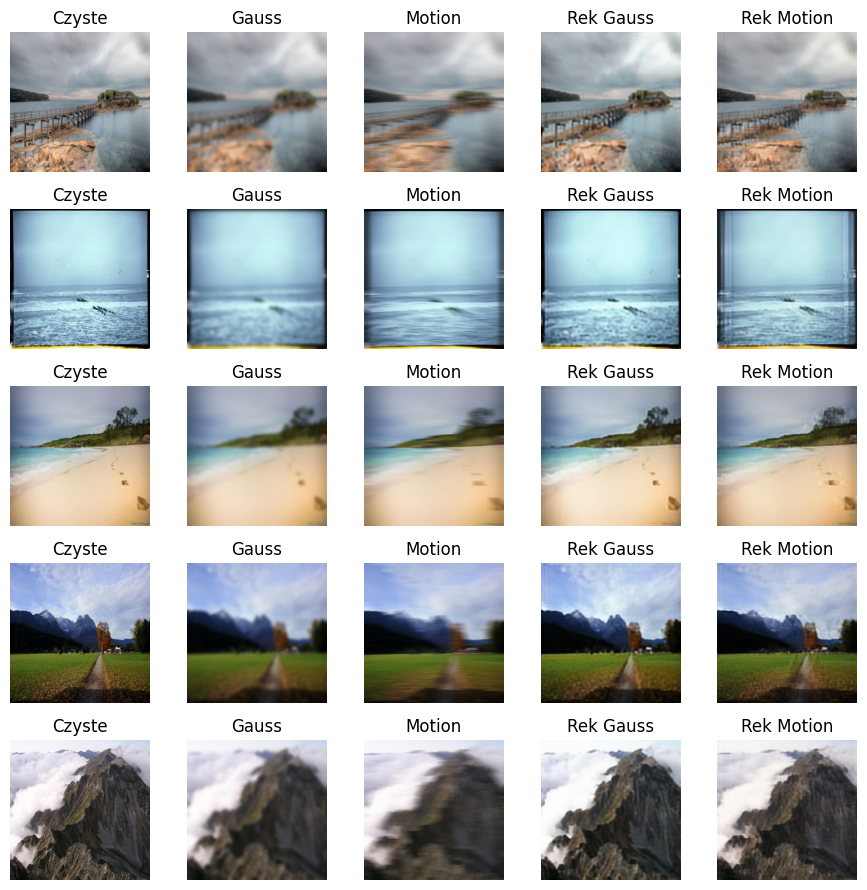

In [54]:
with tf.device('/cpu:0'):
    x_reconst20 = loaded_rtx20_2.predict(x_test_blurred)
    x_reconst20szum = model.predict(x_test_blurred_motion)

    # Wybieranie losowych 5 indeksów obrazów
    random_indices = random.sample(range(len(x_test_blurred_motion)), 5)

    # Wyświetlanie obrazów

    fig, axes = plt.subplots(nrows=5, ncols=len(random_indices), figsize=(9, 9))
    for i, index in enumerate(random_indices):
        rozm_image = x_test_blurred[index]
        noise_image = x_test_blurred_motion[index]
        clean_image = X_test[index]
        reconst_10 = x_reconst20[index]
        reconst_20 = x_reconst20szum[index]

        # czyste
        axes[i, 0].imshow(clean_image)
        axes[i, 0].set_title("Czyste")
        axes[i, 0].axis("off")

        # zaszumione
        axes[i, 1].imshow(rozm_image)
        axes[i, 1].set_title("Gauss")
        axes[i, 1].axis("off")

        # zaszum
        axes[i, 2].imshow(noise_image)
        axes[i, 2].set_title("Motion")
        axes[i, 2].axis("off")

        # rekost10
        axes[i, 3].imshow(reconst_10)
        axes[i, 3].set_title("Rek Gauss")
        axes[i, 3].axis("off")

        # rekonst20
        axes[i, 4].imshow(reconst_20)
        axes[i, 4].set_title("Rek Motion")
        axes[i, 4].axis("off")

    plt.tight_layout()
    plt.show()

In [96]:
# Генерация 5 случайных индексов для выбора примеров из X_test
random_indices = np.random.choice(len(X_test), 5, replace=False)

lab_err_model1 = []
lab_err_model2 = []

for i in random_indices:
    pred_model1 = np.array(x_reconst20[i])
    pred_model2 = np.array(x_reconst20szum[i])
    target = X_test[i]
    #target1 = X_test1[i]

    err_model1 = np.sqrt(np.mean((target - pred_model1)**2))
    err_model2 = np.sqrt(np.mean((target - pred_model2)**2))

    lab_err_model1.append(err_model1)
    lab_err_model2.append(err_model2)

print("MSE rozm Gaussa:", lab_err_model1, '\n')
print("MSE szum Motion:", lab_err_model2, '\n')


MSE rozm Gaussa: [0.03276538971929939, 0.03821520798258353, 0.07985273784215305, 0.026138247340182812, 0.05018771517531025] 

MSE szum Motion: [0.031097978724096524, 0.02683030169013043, 0.08505058984731595, 0.010964297436517216, 0.033334027473025565] 



#####################################################################

In [21]:
# input_shape = (256, 256, 3)
# def create_denoising_autoencoder(input_shape):
#     # input
#     inputs = tf.keras.Input(shape=input_shape)
#     # Encoder
#     x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)
#     x = layers.MaxPooling2D((2, 2), padding='same')(x)
#     x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = layers.MaxPooling2D((2, 2), padding='same')(x)
#     x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#     encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
#
#     # Decoder
#     x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = layers.UpSampling2D((2, 2))(x)
#     x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#     x = layers.UpSampling2D((2, 2))(x)
#     decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
#
#     # Autoencoder model
#     autoencoder = tf.keras.Model(inputs, decoded)
#     autoencoder.compile(optimizer='adam', loss='mse')
#     return autoencoder
#
# # Create denoising autoencoder
# denoising_autoencoder = create_denoising_autoencoder(input_shape)
# denoising_autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        1846

In [ ]:
# def create_denoising_autoencoder(input_shape):
#     # Encoder
#     inputs = tf.keras.Input(shape=input_shape)
#     x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
#     x = layers.MaxPooling2D((2, 2), padding='same')(x)
#     x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#     encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
#
#     # Decoder
#     x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
#     x = layers.UpSampling2D((2, 2))(x)
#     x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = layers.UpSampling2D((2, 2))(x)
#     decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
#
#     # Autoencoder model
#     autoencoder = tf.keras.Model(inputs, decoded)
#     autoencoder.compile(optimizer='adam', loss='mse')
#
#     return autoencoder
#
# # Create denoising autoencoder
# input_shape = (500, 500, 3)
# denoising_autoencoder = create_denoising_autoencoder(input_shape)
# denoising_autoencoder.summary()

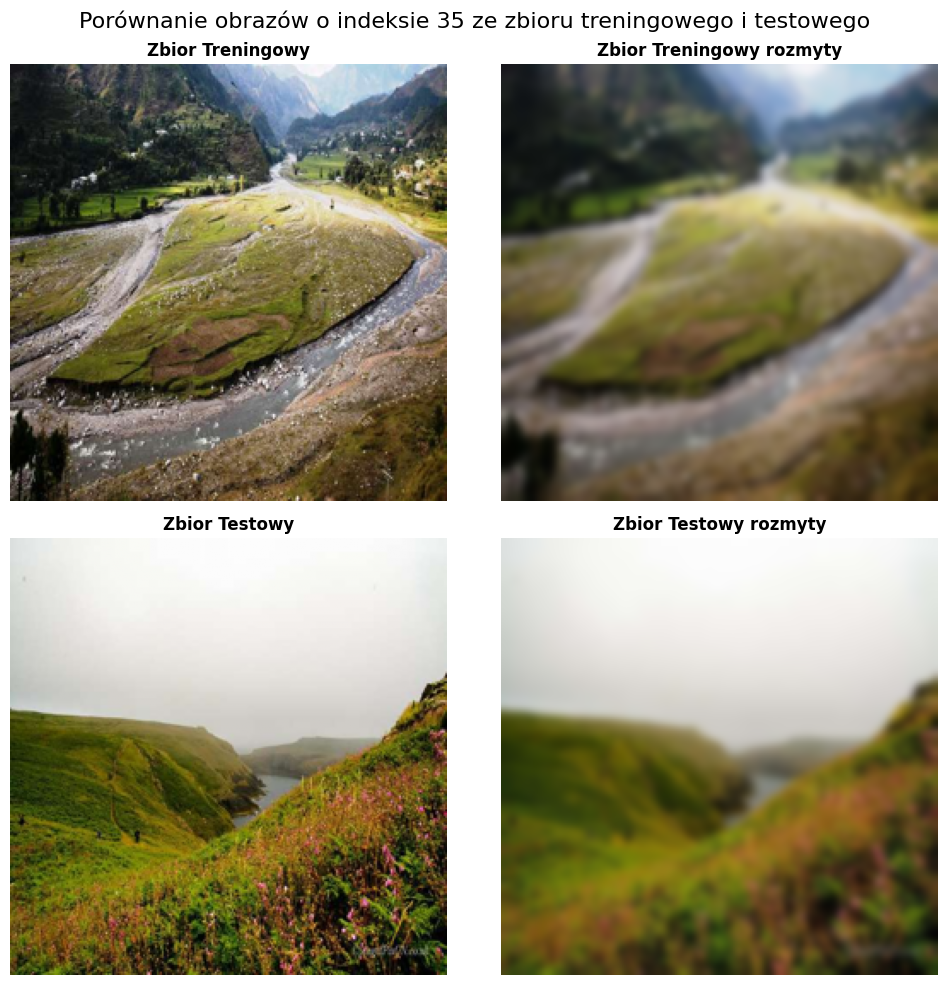

In [10]:
import matplotlib.pyplot as plt

# Определение порядкового номера изображения
index = 35  # Замените на нужный вам индекс

# Выбор массивов данных и получение изображений
arrays = [X_train, x_train_blurred, X_test, x_test_blurred]
array_names = ['Zbior Treningowy', 'Zbior Treningowy rozmyty', 'Zbior Testowy', 'Zbior Testowy rozmyty']

# Определение размера сетки для вывода изображений
num_rows = 2
num_cols = 2

# Создание сетки для вывода изображений
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Вывод изображений на экран
for i, ax in enumerate(axes.flat):
    ax.imshow(arrays[i][index])
    ax.set_title(array_names[i], fontsize=12, weight='bold')
    ax.axis('off')
plt.suptitle('Porównanie obrazów o indeksie 35 ze zbioru treningowego i testowego', fontsize=16)
# Показать сетку изображений
plt.tight_layout()
plt.show()


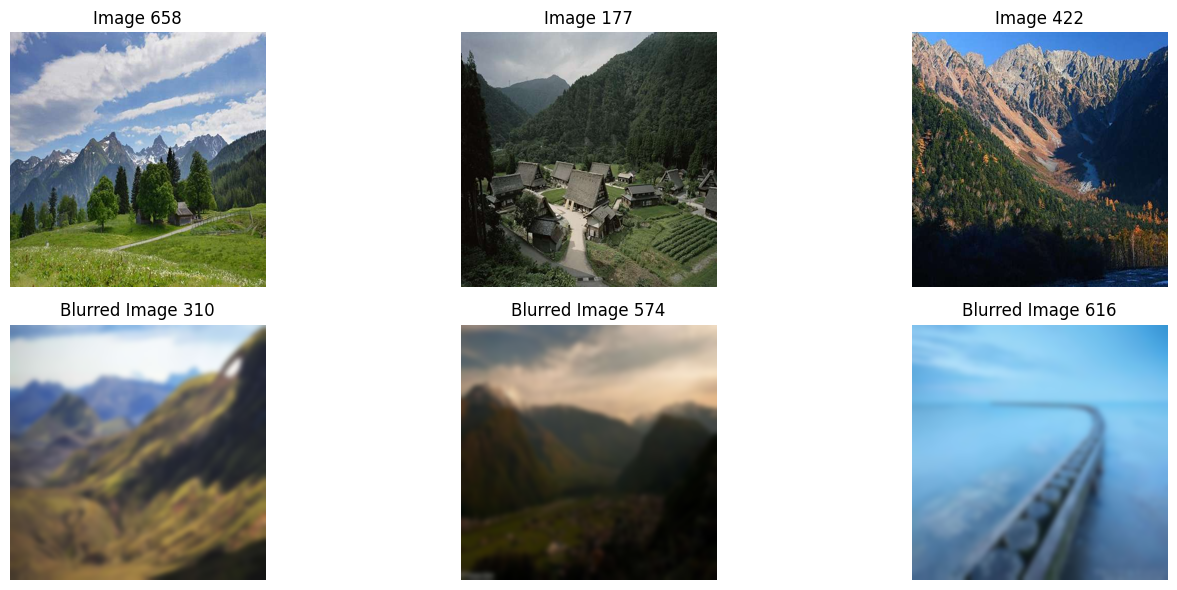

In [17]:
# Определение количества изображений, которые мы хотим вывести
num_images = 3

# Генерация случайных индексов для изображений
random_indexes_X_train = np.random.randint(0, len(X_train), size=num_images)
random_indexes_x_train_blurred = np.random.randint(0, len(x_train_blurred), size=num_images)

# Создание сетки для вывода изображений
fig, axes = plt.subplots(2, num_images, figsize=(15, 6))

# Вывод изображений из X_train
for i, idx in enumerate(random_indexes_X_train):
    axes[0, i].imshow(X_train[idx])
    axes[0, i].axis('off')
    axes[0, i].set_title('Image {}'.format(idx))

# Вывод изображений из x_train_blurred
for i, idx in enumerate(random_indexes_x_train_blurred):
    axes[1, i].imshow(x_train_blurred[idx])
    axes[1, i].axis('off')
    axes[1, i].set_title('Blurred Image {}'.format(idx))

# Показать изображения
plt.tight_layout()
plt.show()